In [1]:
import psycopg2 as pg2
import pandas as pd
import math

In [4]:
print ("Connecting to SQL")
conn = pg2.connect(user='postgres',  dbname='penny', host='localhost', port='5432', password='password')

print ("Reading Dataset")
df = pd.read_sql ("""Select * from auction_full where auctiontime >= '2020-02-01'""", conn)

Connecting to SQL
Reading Dataset


In [5]:
df['profit'] = df['is_winner'] * (df["cashvalue"] - df["fee"] - df["bid"]/100) -.4

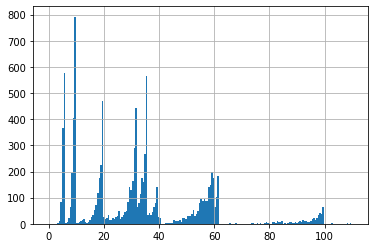

In [30]:
df.profit[(df.profit > -.4)&(df.profit < 120)].hist(bins=200)

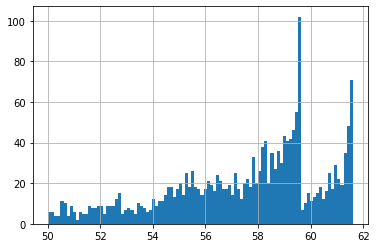

In [34]:
df.profit [(df.profit > 50)&(df.profit < 63)].hist(bins=100)

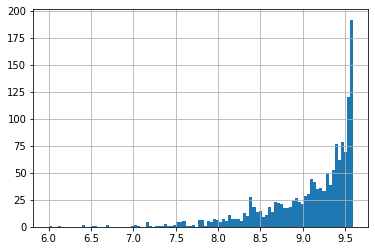

In [14]:
df.profit [(df.profit > 5.7)&(df.profit < 9.7)].hist(bins=100)

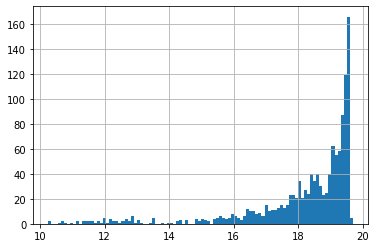

In [20]:
df.profit [(df.profit > 9.7)&(df.profit < 19.7)].hist(bins=100)

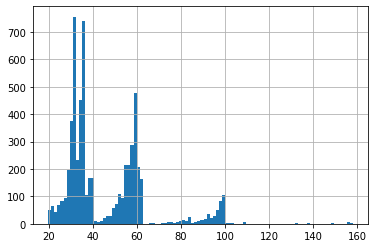

In [21]:
df.profit [(df.profit > 19.7)&(df.profit < 1000)].hist(bins=100)

In [1]:
df.perc_to_bin[(df.perc_to_bin > .1 ) & (df.perc_to_bin < 1)&(df.giveup==False)].hist(bins=20)


NameError: name 'df' is not defined

In [ ]:
df["bucket"]=df.perc_to_bin.apply(lambda x: int(round(int(x*300))/30.0))

In [ ]:
df.groupby("bucket").mean().loc[:,["bucket", "giveup"]].head(11).plot()

In [ ]:
df.groupby("bucket").mean().loc[:,["perc_to_bin", "giveup"]].head(11)

In [ ]:
def shuffle_column(X, feature_index):
    ''' 
    Parameters
    ----------
    X: numpy array
    feature_index: int
    
    Returns
    -------
    X_new: numpy array
    
    Returns a new array identical to X but
    with all the values in column feature_index
    shuffled
    '''   
    
    X_new = X.copy()
    X_new[feature_index] = np.random.permutation(X_new[feature_index])
    return X_new    

def permutation_importance(model, X_test, y_test, scorer=accuracy_score):
    ''' Calculates permutation feature importance for a fitted model
    
    Parameters
    ----------
    model: anything with a predict() method
    X_test, y_test: numpy arrays of data
        unseen by model
    scorer: function. Should be a "higher is better" scoring function,
        meaning that if you want to use an error metric, you should
        multiply it by -1 first.
        ex: >> neg_mse = lambda y1, y2: -mean_squared_error(y1, y2)
            >> permutation_importance(mod, X, y, scorer=neg_mse)
    
    Returns
    -------
    feat_importances: numpy array of permutation importance
        for each feature
    
    '''
    
    feat_importances = np.zeros(X_test.shape[1])
    test_score = scorer(model.predict(X_test), y_test)
    for i in range(X_test.shape[1]):
        X_test_shuffled = shuffle_column(X_test, X_test.columns[i])
        test_score_permuted = scorer(y_test, model.predict(X_test_shuffled))
        print(test_score, test_score_permuted)
        feat_importances[i] = test_score - test_score_permuted
    return feat_importances

In [31]:
X_test.columns

NameError: name 'X_test' is not defined

In [ ]:
pis = permutation_importance(pm, X_test, y_test)
for c, pi in sorted(zip(X_test.columns, pis), key=lambda x: abs(x[1])):
    print(c, pi)
    
key=lambda x: x[1]